#|Supervised Learning| Find Classification Algorithm to determine whether customers will purchase the company’s product or not?


#Import libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier

#Read CSV file

In [41]:
customers_data = pd.read_csv('/content/final_submission.csv')

#Exploratory Data Analysis, Visualization, Data Engineering, Feature Engineering,Feature Selection, Data Cleaning, Data Standardization, Categorical Encoding, and Regularization

In [42]:
customers_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [43]:
customers_data.shape

(2240, 29)

In [44]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#checking for null values

In [45]:
customers_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#Dropping the rows with null values

In [46]:
customers_data.dropna(axis = 0, subset = 'Income', inplace=True)
customers_data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Observations

1. Data contains 2240 rows and 29 columns
2. It has 1 float, 3 object and 25 int columns
3. Dt_Customer that indicates the date, we have to change in DateTime format
4. There are some categorical features in our data frame, there are some features in dtype: object. So we will need to convert them into numeric forms
5. Many categorical columns are already in the format of int, like AcceptedCmp1, Response
6. There are 24 missing values in Income column

# Data after removing null values

In [47]:
print("Data after removing null values:", len(customers_data))

Data after removing null values: 2216


In [48]:
customers_data.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

#Observations:

1. Z_Revenue & Z_CostContact have Constant value, which don't provide any information so we can drop them

2. Response - AcceptedCmp5 are all Binary Variables

3. Marital_Status & Education, we can take as Categorical Variable

4. Kidhome & Teenhome are Discrete Ordinal Variables

5. The rest 17 variables are Continuous Ordinal Variables

# Combining different dataframe into a single column to reduce the number of dimension and Deleting some columnn to reduce dimension and complexity of model

In [49]:
customers_data['Kids'] = np.where((customers_data['Kidhome'] + customers_data['Teenhome']) > 0, 1, 0)       # this means, if the summation of each row from "Kidhome" and "Teenhome" is greater than 0
                                                                                  # it means the customer has a kid at home i.e 1. Otherwise no child i.e 0
customers_data = customers_data.drop('Kidhome', axis=1)
customers_data = customers_data.drop('Teenhome', axis=1)
customers_data['Kids'].value_counts()

1    1583
0     633
Name: Kids, dtype: int64

In [50]:
customers_data['TotalAcceptedCmp'] = np.where(customers_data['AcceptedCmp1'] + customers_data['AcceptedCmp2'] + customers_data['AcceptedCmp3'] + customers_data['AcceptedCmp4'] + customers_data['AcceptedCmp5'] +customers_data['Response']> 0, 1, 0)

customers_data = customers_data.drop('AcceptedCmp1', axis=1)
customers_data = customers_data.drop('AcceptedCmp2', axis=1)
customers_data = customers_data.drop('AcceptedCmp3', axis=1)
customers_data = customers_data.drop('AcceptedCmp4', axis=1)
customers_data = customers_data.drop('AcceptedCmp5', axis=1)
customers_data = customers_data.drop('Response', axis=1)
customers_data['TotalAcceptedCmp'].value_counts()


0    1611
1     605
Name: TotalAcceptedCmp, dtype: int64

# We are grouping 'Married', 'Together' as "relationship"
#Whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as "Single"

In [51]:
customers_data['Marital_Status'] = customers_data['Marital_Status'].replace(['Married', 'Together'],'relationship')
customers_data['Marital_Status'] = customers_data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')
customers_data['Marital_Status'].value_counts()

relationship    1430
Single           786
Name: Marital_Status, dtype: int64

# Changing education category into UG and PG only

In [52]:
customers_data['Education'] = customers_data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
customers_data['Education'] = customers_data['Education'].replace(['Basic'], 'UG')
customers_data['Education'].value_counts()

PG    2162
UG      54
Name: Education, dtype: int64

# We have to calculate the "Age" of a customer by the "Year_Birth"

In [53]:
customers_data['Age'] = 2023 - customers_data["Year_Birth"]
customers_data.drop('Year_Birth', axis=1, inplace=True)
customers_data = customers_data[customers_data['Age']<100]
customers_data['Age'].value_counts()

47    89
52    86
48    83
51    78
45    76
53    75
58    74
50    72
54    70
49    69
67    55
44    53
65    52
46    52
71    52
55    51
57    50
64    50
63    49
69    49
68    48
41    44
60    44
61    44
56    44
72    42
59    41
40    41
37    41
66    41
43    39
39    38
42    38
70    35
62    35
38    32
74    30
34    29
35    29
73    29
36    27
75    21
33    18
77    16
76    16
32    15
31    13
78     8
79     7
80     6
30     5
28     5
29     3
27     2
82     1
83     1
Name: Age, dtype: int64

# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format

In [54]:
customers_data["Dt_Customer"] = pd.to_datetime(customers_data["Dt_Customer"])
dates = []
for i in customers_data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


<ipython-input-54-dc99505314bb>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customers_data["Dt_Customer"] = pd.to_datetime(customers_data["Dt_Customer"])


#Dropping some columns from our dataframe, which is useless for our analysis

In [55]:
customers_data = customers_data.drop('Z_Revenue', axis=1)
customers_data = customers_data.drop('ID', axis=1)
customers_data = customers_data.drop('Z_CostContact', axis=1)

In [56]:
customers_data.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Kids,TotalAcceptedCmp,Age
0,PG,Single,58138.0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,1,66
1,PG,Single,46344.0,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,1,0,69
2,PG,relationship,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,58
3,PG,relationship,26646.0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,1,0,39
4,PG,relationship,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,1,0,42


In [57]:
customers_data.shape

(2213, 20)

In [58]:
customers_data.dtypes

Education                      object
Marital_Status                 object
Income                        float64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Complain                        int64
Kids                            int64
TotalAcceptedCmp                int64
Age                             int64
dtype: object

In [59]:
customers_data.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Kids,TotalAcceptedCmp,Age
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,52236.581563,49.007682,305.153638,26.323995,166.962494,37.635337,27.034794,43.911432,2.325350,4.087664,2.671487,5.805242,5.321735,0.009038,0.714415,0.272933,54.082693
std,25178.603047,28.941864,337.305490,39.735932,224.226178,54.763278,41.085433,51.699746,1.924402,2.741664,2.927096,3.250752,2.425092,0.094657,0.451795,0.445567,11.700216
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
25%,35246.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,46.000000
50%,51373.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,1.000000,0.000000,53.000000
75%,68487.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,1.000000,1.000000,64.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,83.000000


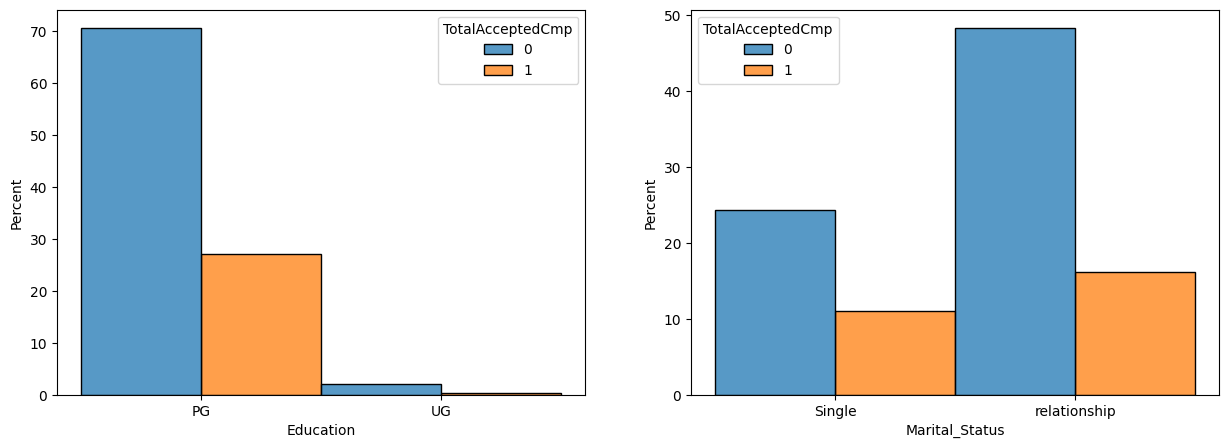

In [60]:

# Education & TotalAcceptedCmp
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=customers_data, x="Education", hue="TotalAcceptedCmp", multiple="dodge", stat="percent")

# Marital_Status & TotalAcceptedCmp
plt.subplot(122)
sns.histplot(data=customers_data, x="Marital_Status", hue="TotalAcceptedCmp",stat="percent", multiple="dodge")
plt.show()



# According to TotalAcceptedCmp, this is an unbalanced dataset, over 70% customers(education level=PG) and below 10% customers(education level=UG) have not accepted the offers to the all campaigns from 1 to 5 and last one.

# According to TotalAcceptedCmp, this is an unbalanced dataset, over 20% customers(Martial_Status=Single) and below 50% customer(Martial_Status=relationship) have not accepted the offers to the all campaigns from 1 to 5 and last one.

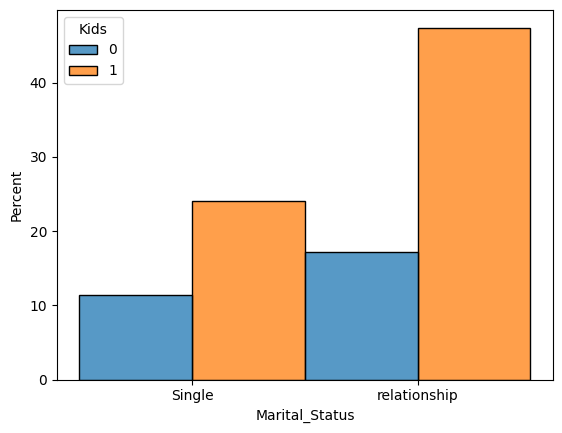

In [61]:
# Marital_Status & Kids
sns.histplot(data=customers_data, x="Marital_Status", hue="Kids",stat="percent", multiple="dodge")
plt.show()

# According to Kids, this is an unbalanced dataset, over 10% customers(Martial_Status=Single) and below 30% customer(Martial_Status=relationship) have no kids at home and over 20% customers(Martial_Status=Single) and below 50% customer(Martial_Status=relationship) have kids at home

<Axes: xlabel='Education', ylabel='count'>

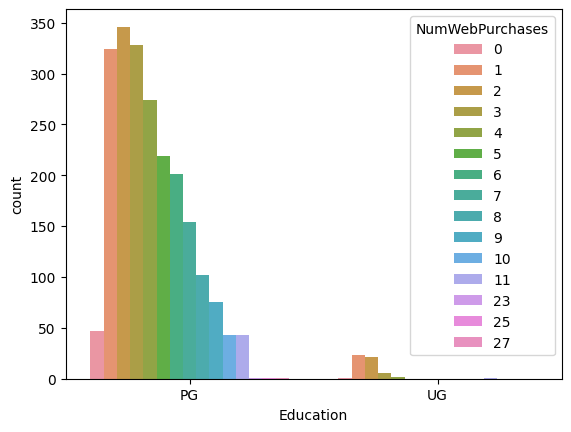

In [62]:
sns.countplot(x='Education', hue='NumWebPurchases', data=customers_data)

# According, to countplot, we can observe that how many PG and UG students has done Number of purchases through the company’s website, highest is more than 300 is 2(Number of purchases) and lowest is less than 50 approx 40 is 10 and 11(Number of purchases) in PG and  highest is below 50 approx 25 is 1(Number of purchases) and lowest is less than 50 approx 10 is 10 and 11(Number of purchases) in UG.

<Axes: xlabel='Marital_Status', ylabel='count'>

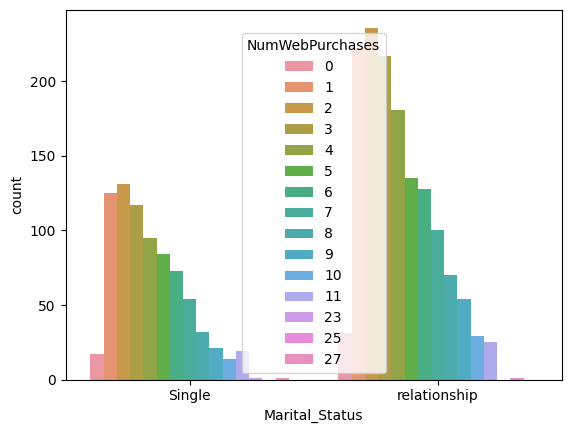

In [63]:
sns.countplot(x='Marital_Status', hue='NumWebPurchases', data=customers_data)

# According, to countplot, we can observe that how many Singles and relationships customers has done Number of purchases through the company’s website, highest is more than 100 is 2(Number of purchases) and lowest is less than 50 approx 20 is 10(Number of purchases) in single category and highest is more than 200 is 2(Number of purchases) and lowest is less than 50 approx 30 is 11(Number of purchases) in relationship category.

<Axes: xlabel='Kids', ylabel='count'>

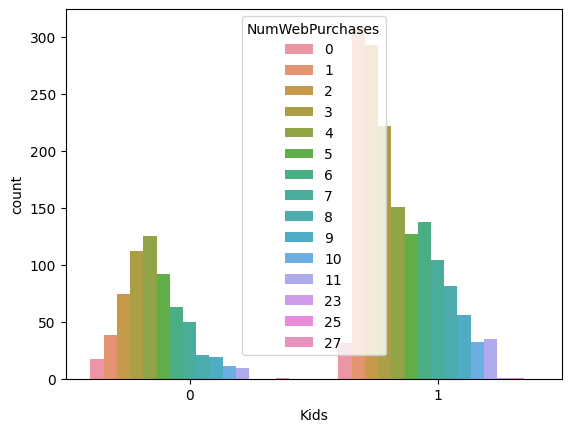

In [64]:
sns.countplot(x='Kids', hue='NumWebPurchases', data=customers_data)

# According, to countplot, we can observe that how many kids at home and kids not at home has done Number of purchases through the company’s website, highest is more than 100 is 4(Number of purchases) and lowest is less than 50 approx 10 is 11(Number of purchases), kids not at home and highest is more than 300 is 1(Number of purchases) and lowest is less than 50 approx 40 is 10(Number of purchases) , kids at home .

<Axes: xlabel='Education', ylabel='count'>

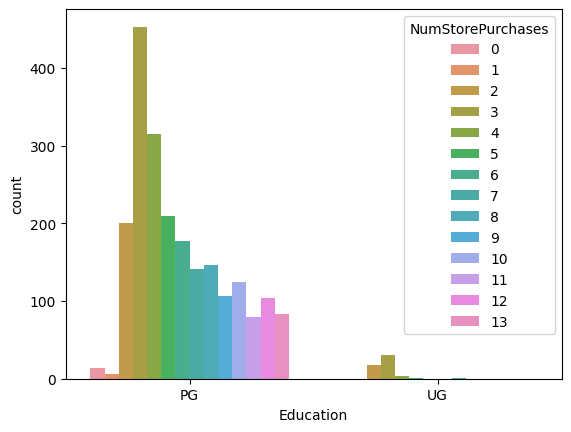

In [65]:
sns.countplot(x='Education', hue='NumStorePurchases', data=customers_data)

# According, to countplot, we can observe that how many PG and UG students has done Number of purchases through the directly stores, highest is more than 400 is 3(Number of purchases) and lowest is less than 50 approx 20 is 10 and 1(Number of purchases) in PG and  highest is below 50 approx 40 is 3(Number of purchases) and lowest is less than 50 approx 10 is 4(Number of purchases) in UG.

<Axes: xlabel='Marital_Status', ylabel='count'>

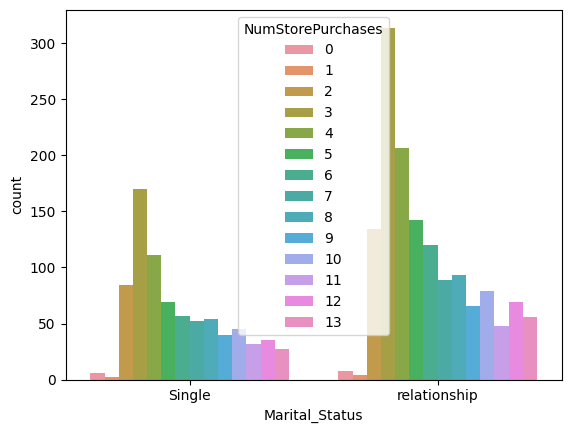

In [66]:
sns.countplot(x='Marital_Status', hue='NumStorePurchases', data=customers_data)

# According, to countplot, we can observe that how many Singles and relationships customers has done Number of purchases through directly stores, highest is more than 150 is 3(Number of purchases) and lowest is less than 50 approx 10 is 1(Number of purchases) in single category and highest is more than 300 is 3(Number of purchases) and lowest is less than 50 approx 15 is 1(Number of purchases) in relationship category.

<Axes: xlabel='Kids', ylabel='count'>

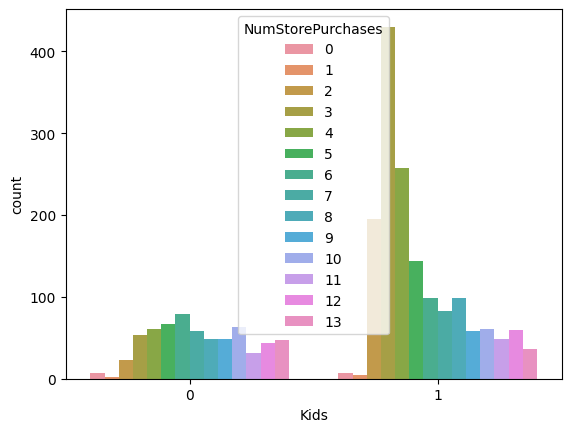

In [67]:
sns.countplot(x='Kids', hue='NumStorePurchases', data=customers_data)

# According, to countplot, we can observe that how many kids at home and kids not at home has done Number of purchases through directly stores, highest is less than 100 is 6(Number of purchases) and lowest is less than 50 approx 5 is 1(Number of purchases), kids not at home and highest is more than 400 is 3(Number of purchases) and lowest is less than 50 approx 20 is 1(Number of purchases) , kids at home .

# Age Range

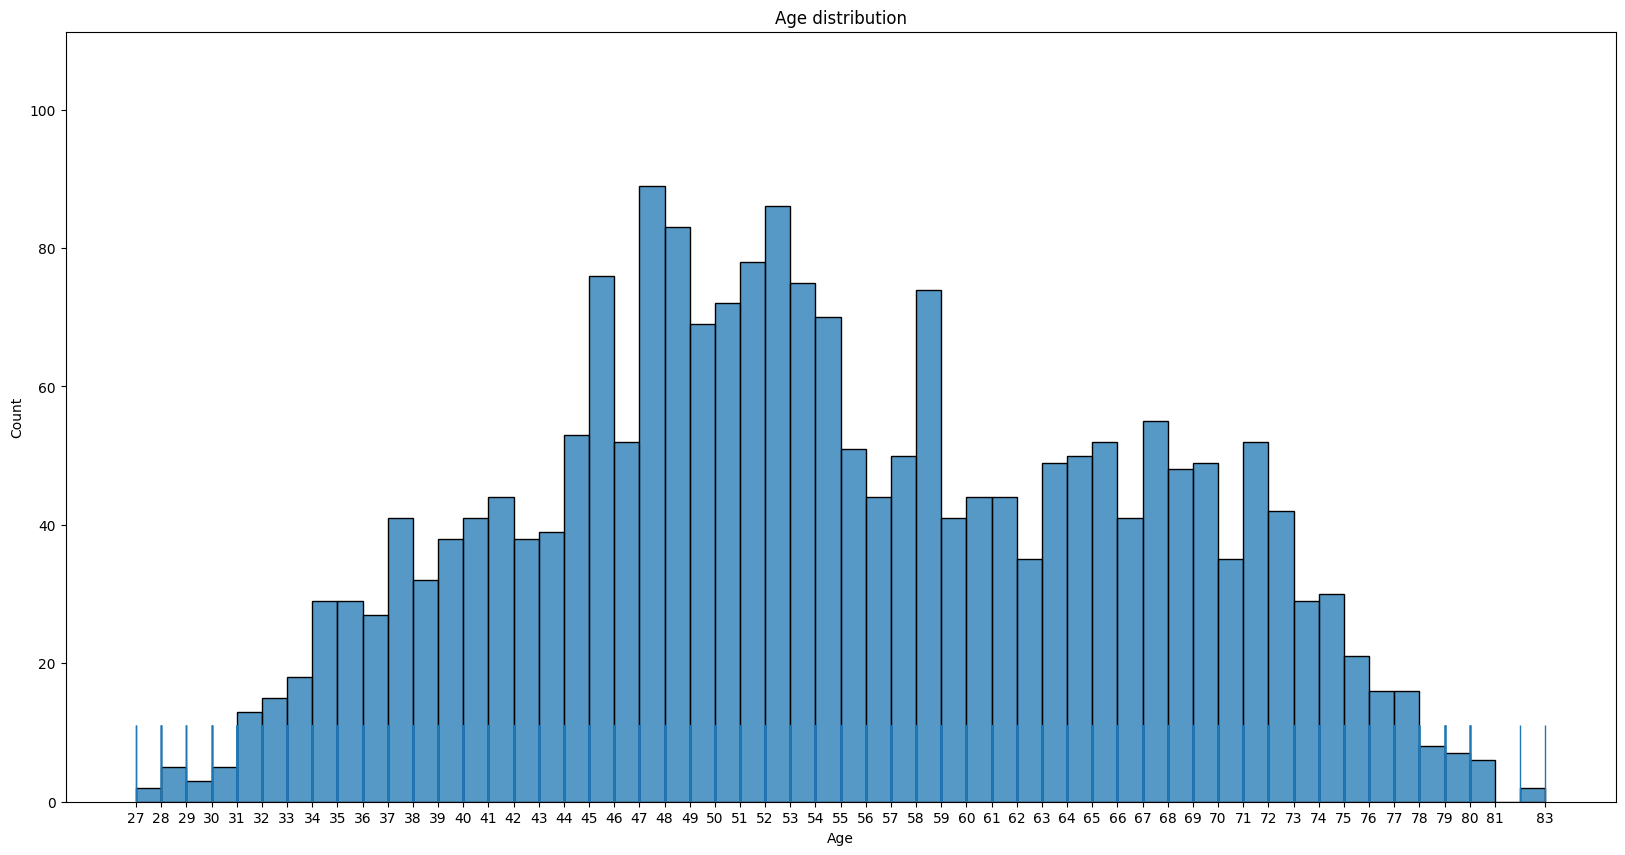

In [68]:

plt.figure(figsize=(20, 10))
plt.title('Age distribution')
ax = sns.histplot(customers_data['Age'].sort_values(), bins=56)
sns.rugplot(data=customers_data['Age'], height=.10)
plt.xticks(np.linspace(customers_data['Age'].min(), customers_data['Age'].max(), 56, dtype=int, endpoint = True))
plt.show()

#The age of the customers are mainly clustering in 40s or 60s, the young people(under 30) are very few.

#These people are at their middle ages or old ages, so their family condition can be taken care furthur.

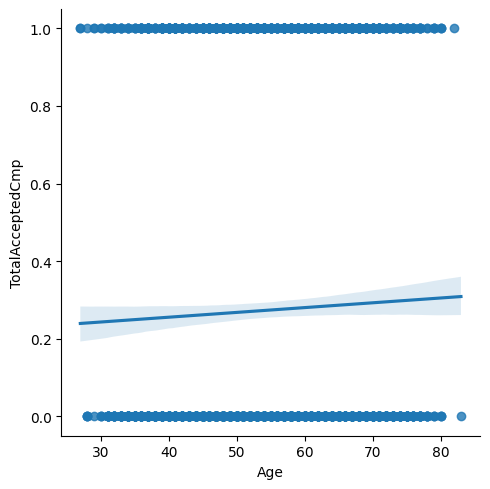

In [69]:
sns.lmplot(x='Age',y='TotalAcceptedCmp',data=customers_data)

# Generate a scatter plot with a linear regression line representing the relationship between the 'Age' and 'TotalAcceptedCmp' variables

# Income Range

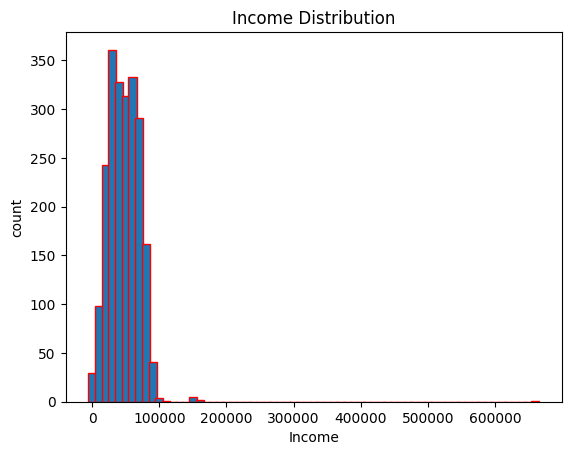

In [70]:

hist, bins = np.histogram(customers_data['Income'], bins=np.arange(0, customers_data['Income'].max() + 10000, 10000))

plt.bar(bins[:-1], hist, width=12000, edgecolor='Red')

plt.xlabel('Income')
plt.ylabel('count')
plt.title('Income Distribution')
plt.show()


# Most customers income levels are below 2L

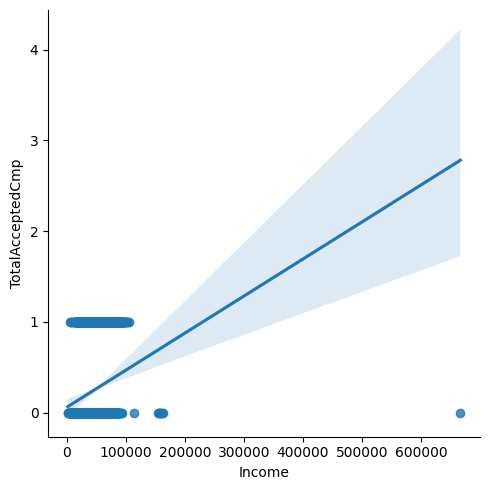

In [71]:
sns.lmplot(x='Income',y='TotalAcceptedCmp',data=customers_data)

# Generate a scatter plot with a linear regression line representing the relationship between the 'Income' and 'TotalAcceptedCmp' variables

# Heat map among all numerical variables

<ipython-input-72-92515990edef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = customers_data.corr()


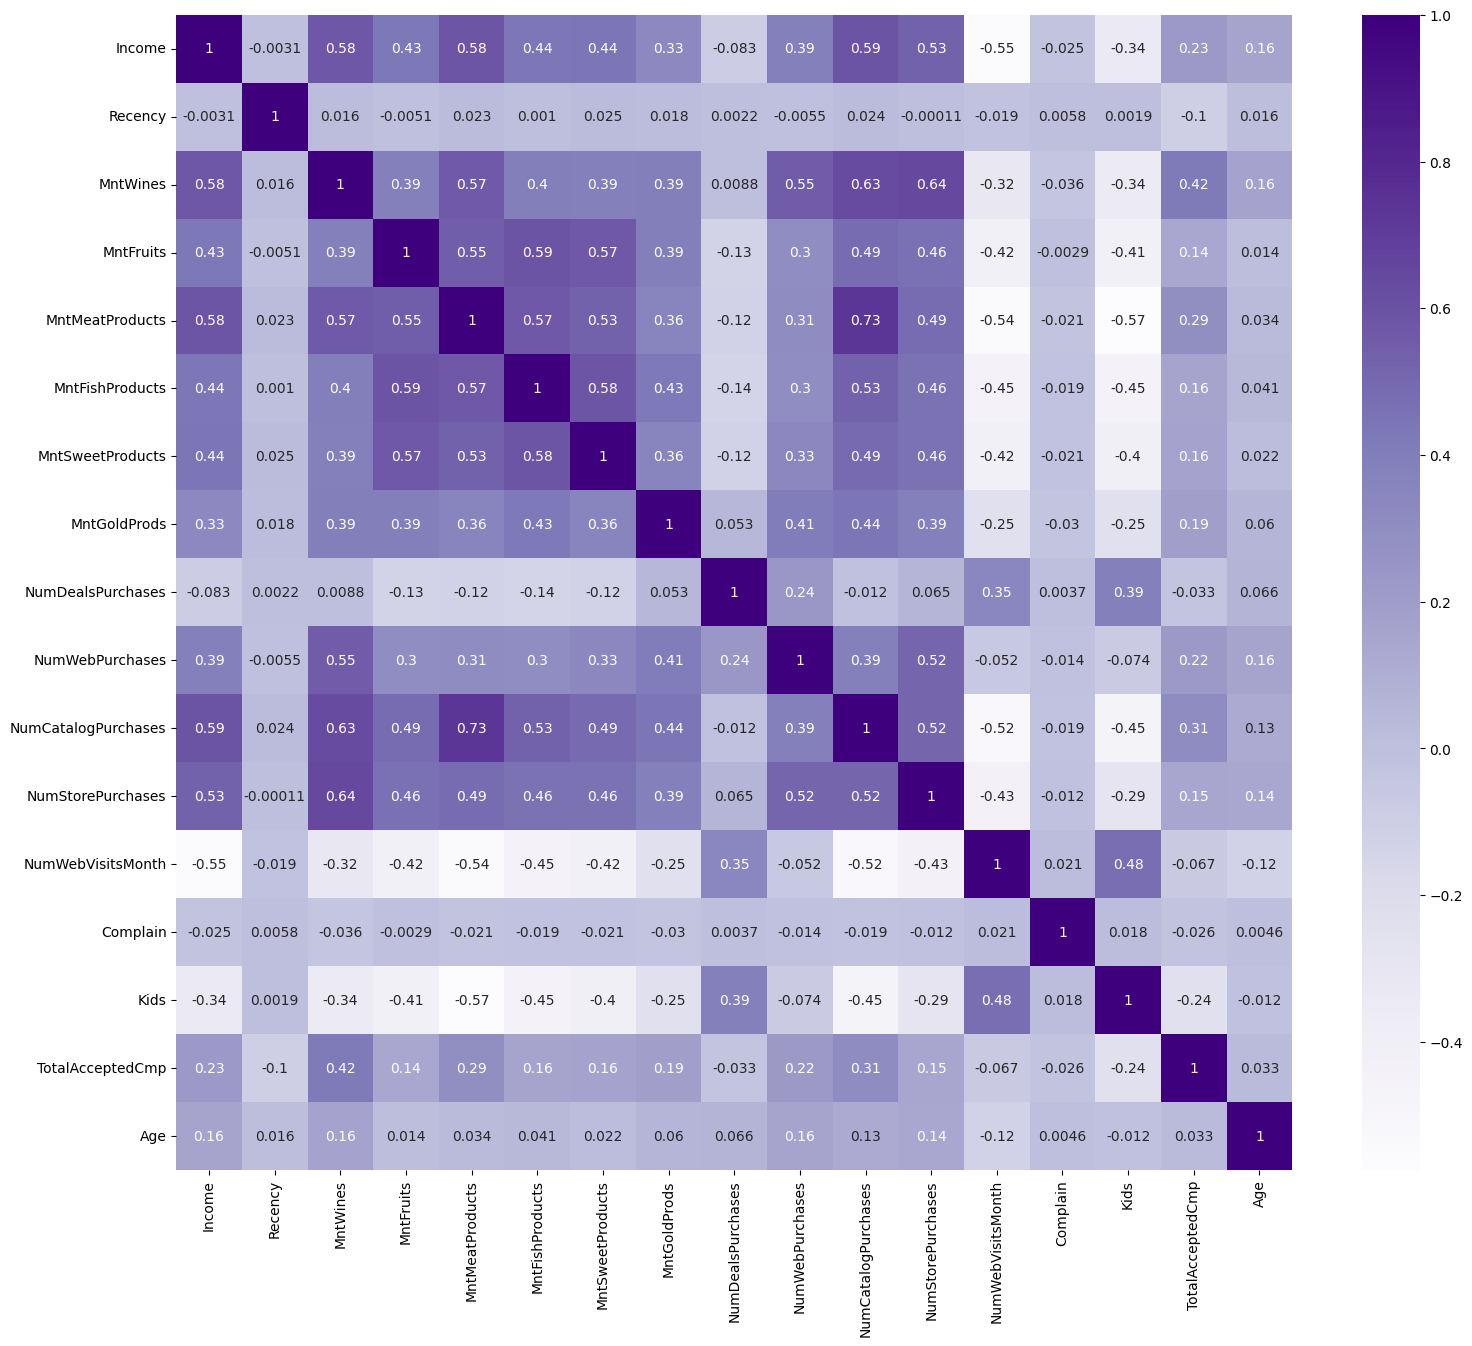

In [72]:
#Heatmap
cor = customers_data.corr()
plt.figure(figsize = (18,15))
sns.heatmap(cor, annot = True, cmap = 'Purples')
plt.show()



MntWines, MntMeatproducts, and NumCatalogPurchase are strongly correlated and others are weak correlated

# Supervised Learning models
## Preparing the data for modeling

In [73]:
# Performing label encoding for Education
label_encoder = LabelEncoder()
customers_data['Education'] = label_encoder.fit_transform(customers_data['Education'])

encoded_labels = label_encoder.classes_
for label, encoded_value in enumerate(encoded_labels):
    print(f"The numerical value {label} corresponds to: {encoded_value}")

The numerical value 0 corresponds to: PG
The numerical value 1 corresponds to: UG


In [74]:
# Performing label encoding for Marital_Status
label_encoder = LabelEncoder()
customers_data['Marital_Status'] =label_encoder.fit_transform(customers_data['Marital_Status'])

encoded_labels = label_encoder.classes_
for label, encoded_value in enumerate(encoded_labels):
    print(f"The numerical value {label} corresponds to: {encoded_value}")

The numerical value 0 corresponds to: Single
The numerical value 1 corresponds to: relationship


In [75]:
customers_data.dtypes

Education                       int64
Marital_Status                  int64
Income                        float64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Complain                        int64
Kids                            int64
TotalAcceptedCmp                int64
Age                             int64
dtype: object

In [76]:
customers_data.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Kids,TotalAcceptedCmp,Age
0,0,0,58138.0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,1,66
1,0,0,46344.0,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,1,0,69
2,0,1,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,58
3,0,1,26646.0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,1,0,39
4,0,1,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,1,0,42


# Explaining the set of features for X and response for y

In [77]:
cols = ['Dt_Customer', 'TotalAcceptedCmp']
X = customers_data.drop(cols, axis=1)
X.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Kids,Age
0,0,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,66
1,0,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,1,69
2,0,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,58
3,0,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,1,39
4,0,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,1,42


In [78]:
y = customers_data [ 'TotalAcceptedCmp' ]
y

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2213, dtype: int64

# Splitting the data with training and testing sets

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state=42)

print("Total sample size = %i;\nFeature training sample size = %i,\nTarget training sample size = %i,\nFeature testing sample size = %i,\nTarget testing sample size = %i"
      % (customers_data.shape[0], X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]))

Total sample size = 2213;
Feature training sample size = 1106,
Target training sample size = 1106,
Feature testing sample size = 1107,
Target testing sample size = 1107


#KNN

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       786
           1       0.66      0.40      0.50       321

    accuracy                           0.77      1107
   macro avg       0.73      0.66      0.67      1107
weighted avg       0.75      0.77      0.75      1107



Text(50.722222222222214, 0.5, 'True')

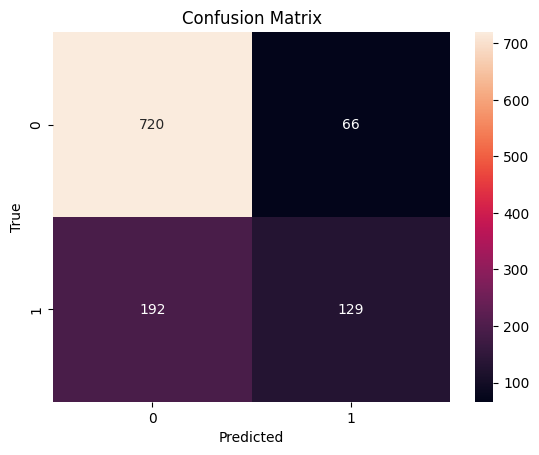

In [80]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn_model = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')



1. This indicates that the model has a 77% accuracy.

2. precision, This indicates that the model has a 79% precision for 0 class and an 66% precision for the 1 class.

3. recall, This indicates that the model can accurately identify 88% of the relevant data for class 0 and 65% of the relevant data for class 1.

4. f1 score, This indicates that the test accuracy is 85% for class 0 and 50% for class 1.

   CONCLUSION:
   There were a total of 1107 records in the dataset, out of which 80% of the data was given for training the model and
   20% of the data, i.e. 221 records, were given for testing the model.
   Based on the confusion matrix, out of these 1107 records, 258 records were misclassified.

#Decision Tree

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       786
           1       0.63      0.61      0.62       321

    accuracy                           0.78      1107
   macro avg       0.74      0.73      0.73      1107
weighted avg       0.78      0.78      0.78      1107



Text(50.722222222222214, 0.5, 'True')

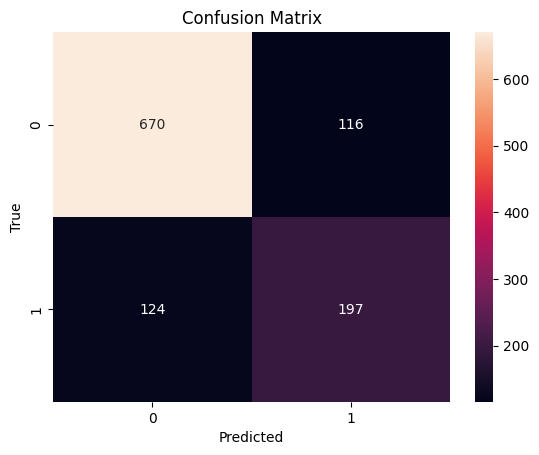

In [81]:
dt = DecisionTreeClassifier(max_depth=3, class_weight='balanced', min_weight_fraction_leaf=0.01)
dt_model = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


1. This indicates that the model has a 78% accuracy.

2. precision, This indicates that the model has a 84% precision for 0 class and an 63% precision for the 1 class.

3. recall, This indicates that the model can accurately identify 85% of the relevant data for class 0 and 61% of the relevant data for class 1.

4. f1 score,This indicates that the test accuracy is 85% for class 0 and 62% for class 1.

   CONCLUSION:
   There were a total of 1107 records in the dataset, out of which 80% of the data was given for training the model and
   20% of the data, i.e. 221 records, were given for testing the model.
   Based on the confusion matrix, out of these 1107 records, 240 records were misclassified.

#Logistic Regression

              precision    recall  f1-score   support

           0       0.78      0.95      0.85       786
           1       0.72      0.33      0.45       321

    accuracy                           0.77      1107
   macro avg       0.75      0.64      0.65      1107
weighted avg       0.76      0.77      0.74      1107



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'True')

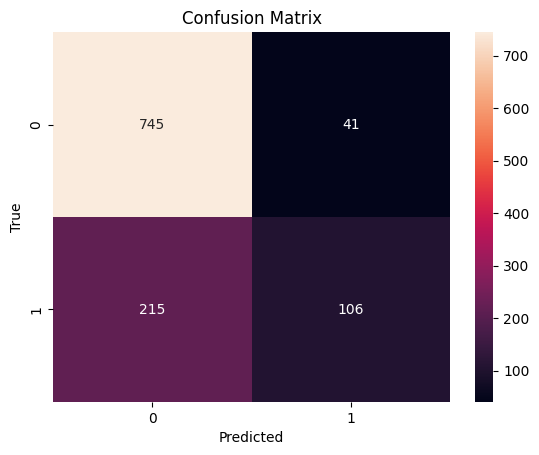

In [82]:
lgr = LogisticRegression()
lgr_model = lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


1. This indicates that the model has a 77% accuracy.

2. precision, This indicates that the model has a 78% precision for 0 class and an 72% precision for the 1 class.

3. recall, This indicates that the model can accurately identify 95% of the relevant data for class 0 and 33% of the relevant data for class 1.

4. f1 score,This indicates that the test accuracy is 85% for class 0 and 45% for class 1.

   CONCLUSION:
   There were a total of 1107 records in the dataset, out of which 80% of the data was given for training the model and
   20% of the data, i.e. 221 records, were given for testing the model.
   Based on the confusion matrix, out of these 1107 records, 256 records were misclassified.

#Bagging

              precision    recall  f1-score   support

           0       0.78      0.95      0.85       786
           1       0.72      0.33      0.45       321

    accuracy                           0.77      1107
   macro avg       0.75      0.64      0.65      1107
weighted avg       0.76      0.77      0.74      1107



Text(50.722222222222214, 0.5, 'True')

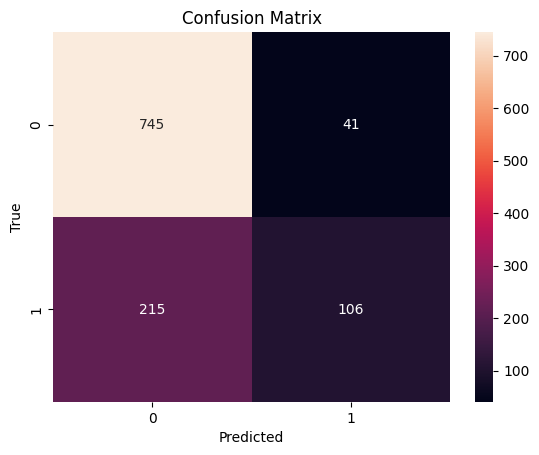

In [83]:
bagging = BaggingClassifier(
    KNeighborsClassifier(
        n_neighbors=2,
        weights='distance'
        ),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0
    )
bag_model = bagging.fit(X_train, y_train)

y_pred = lgr.predict(X_test)
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

1. This indicates that the model has a 77% accuracy.

2. precision, This indicates that the model has a 78% precision for 0 class and an 72% precision for the 1 class.

3. recall, This indicates that the model can accurately identify 95% of the relevant data for class 0 and 33% of the relevant data for class 1.

4. f1 score,This indicates that the test accuracy is 85% for class 0 and 45% for class 1.

   CONCLUSION:
   There were a total of 1107 records in the dataset, out of which 80% of the data was given for training the model and
   20% of the data, i.e. 221 records, were given for testing the model.
   Based on the confusion matrix, out of these 1107 records, 256 records were misclassified.

# Random Forest

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       786
           1       0.62      0.72      0.66       321

    accuracy                           0.79      1107
   macro avg       0.75      0.77      0.76      1107
weighted avg       0.80      0.79      0.79      1107



Text(50.722222222222214, 0.5, 'True')

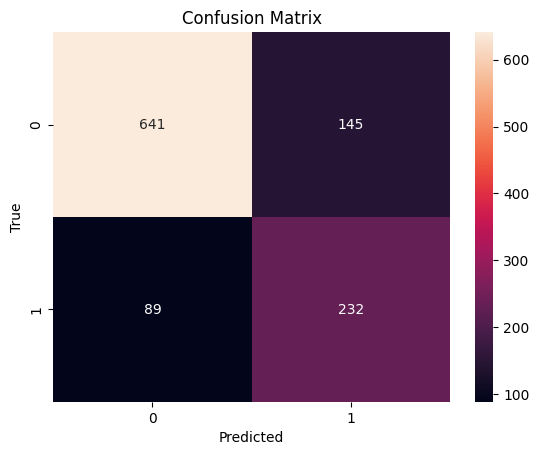

In [84]:

rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=10,
    class_weight="balanced",
    min_weight_fraction_leaf=0.02
    )
rf_model = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


1. This indicates that the model has a 78% accuracy.

2. precision, This indicates that the model has a 88% precision for 0 class and an 61% precision for the 1 class.

3. recall, This indicates that the model can accurately identify 81% of the relevant data for class 0 and 72% of the relevant data for class 1.

4. f1 score,This indicates that the test accuracy is 84% for class 0 and 66% for class 1.

   CONCLUSION:
   There were a total of 1107 records in the dataset, out of which 80% of the data was given for training the model and
   20% of the data, i.e. 221 records, were given for testing the model.
   Based on the confusion matrix, out of these 1107 records, 239 records were misclassified.

# Gradient Boosting

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       786
           1       0.69      0.56      0.62       321

    accuracy                           0.80      1107
   macro avg       0.76      0.73      0.74      1107
weighted avg       0.79      0.80      0.79      1107



Text(50.722222222222214, 0.5, 'True')

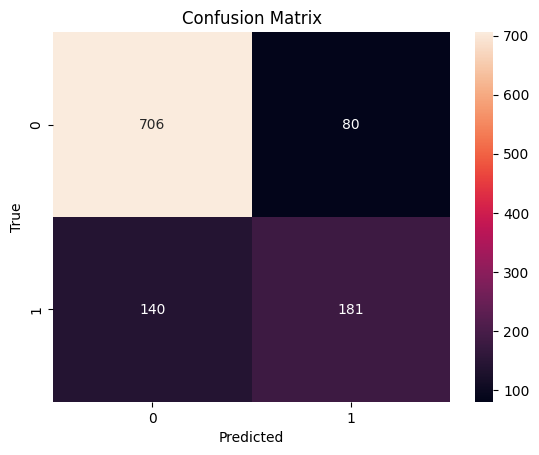

In [85]:

gb = GradientBoostingClassifier(
            loss='exponential',
            n_estimators=1000,
            learning_rate=0.1,
            max_depth=3,
            subsample=0.5,
            random_state=0
            )
gb_model = gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


1. This indicates that the model has a 80% accuracy.

2. precision, This indicates that the model has a 83% precision for 0 class and an 69% precision for the 1 class.

3. recall, This indicates that the model can accurately identify 90% of the relevant data for class 0 and 56% of the relevant data for class 1.

4. f1 score,This indicates that the test accuracy is 87% for class 0 and 62% for class 1.

   CONCLUSION:
   There were a total of 1107 records in the dataset, out of which 80% of the data was given for training the model and
   20% of the data, i.e. 221 records, were given for testing the model.
   Based on the confusion matrix, out of these 1107 records, 220 records were misclassified.

#|Unsupervised Learning| Apply Clustering Method (eg k-means clustering) to segment customers

In [86]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Select relevant columns for PCA and clustering

In [87]:
selected_features = ['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Kids', 'Age', 'TotalAcceptedCmp']

In [88]:
scaled_features = StandardScaler().fit_transform(customers_data[selected_features].values)
scaled_features_customers_data = pd.DataFrame(scaled_features, index=customers_data[selected_features].index, columns=customers_data[selected_features].columns)
scaled_features_customers_data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Kids,Age,TotalAcceptedCmp
0,-0.15815,-1.350076,0.234435,0.310773,0.978107,1.552498,0.852974,0.350656,1.427316,2.504247,-0.555456,0.692198,-0.095498,-1.581639,1.018785,1.632148
1,-0.15815,-1.350076,-0.234084,-0.380424,-0.872266,-0.637451,-0.733466,-0.169104,-1.126455,-0.571168,-1.170837,-0.132699,-0.095498,0.632255,1.275248,-0.612690
2,-0.15815,0.740699,0.769733,-0.795142,0.358351,0.570796,-0.036980,-0.688863,1.427316,-0.229456,1.290688,-0.545148,-0.095498,-1.581639,0.334882,-0.612690
3,-0.15815,0.740699,-1.016592,-0.795142,-0.872266,-0.561936,-0.752813,-0.169104,-0.761631,-0.912881,-0.555456,0.279749,-0.095498,0.632255,-1.289387,-0.612690
4,-0.15815,0.740699,0.240593,1.554927,-0.391881,0.419766,-0.559344,1.390175,0.332842,0.112257,0.059925,-0.132699,-0.095498,0.632255,-1.032923,-0.612690


# Apply PCA for dimensionality reduction

In [100]:
pca = PCA(n_components=5)
reduced_data = pca.fit_transform(scaled_features)
pca = PCA(n_components=3)
pca.fit(scaled_features)
data2 = pd.DataFrame(pca.transform(scaled_features), columns=(["col1","col2", "col3"]))
data2.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,2213.0,1.316414e-16,2.141870,-5.055145,-1.982992,-0.445473,1.855856,7.105250
col2,2213.0,2.889690e-17,1.319957,-3.521942,-0.901732,-0.199609,0.805033,5.588387
col3,2213.0,5.297766e-17,1.078903,-3.996687,-0.723010,-0.124332,0.591751,4.671641


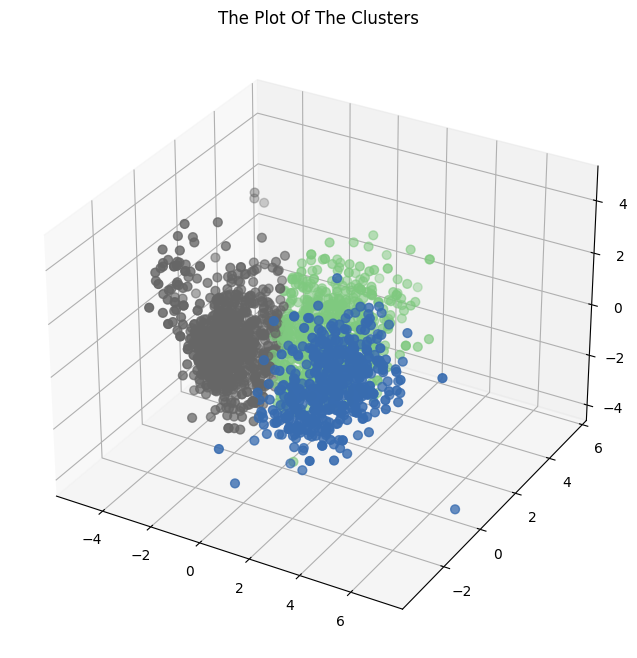

In [102]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(data2["col1"],data2["col2"],data2["col3"], s=40, c=customers_data["Cluster"], marker='o', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()

# Apply K-means clustering

In [94]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

# Get the cluster labels for each data point

In [95]:
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
customers_data['Cluster'] = cluster_labels

# Display the cluster assignments
print(customers_data['Cluster'].value_counts())


2    1043
0     648
1     522
Name: Cluster, dtype: int64


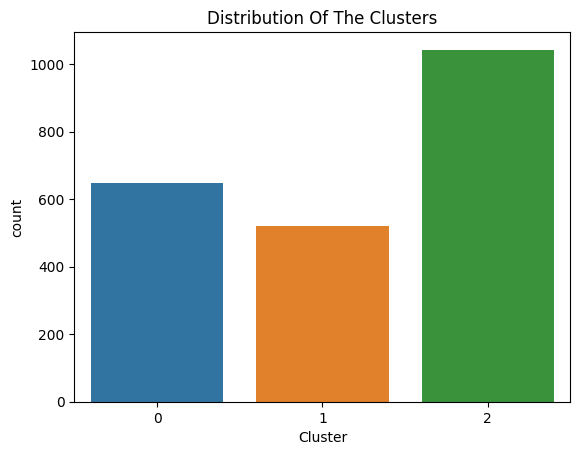

In [96]:
pl = sns.countplot(x=customers_data["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

#As we can see here that weightage of customers are more in cluster 2 as compare to other

In [98]:

# Compute evaluation metrics
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
DBS = davies_bouldin_score(scaled_features, cluster_labels)
CHS = calinski_harabasz_score(scaled_features, cluster_labels)

# Print the evaluation metrics
print("Silhouette Coefficient:", silhouette_avg)
print("Davies-Bouldin Index:", DBS)
print("Calinski-Harabasz Index:", CHS)

Silhouette Coefficient: 0.20307201613937312
Davies-Bouldin Index: 1.963574453070432
Calinski-Harabasz Index: 475.9624112014538


By calculating evalution metrices,you can assess the quality and separation of the clusters generated by a clustering algorithm.

1. The value of Silhouette Coefficient indicates that the clusters have some level of separation but also overlap to some extent. A value closer to 1 would indicate well-separated clusters, while a value closer to 0 suggests overlapping clusters.

2. The value of Davies-Bouldin Index suggests that the clusters are reasonably well-separated, with a lower value indicating better-defined and more distinct clusters.

3. The value of Calinski-Harabasz Index suggests that the clusters are relatively well-separated and compact compared to the within-cluster variation. A higher CHI value indicates better clustering results, with a larger value indicating more distinct and well-separated clusters.